# Project 1 : Cats and dogs classification

### (Project Id :  PRAICP-1011)

###  (Team Id : PTID-AI-AUG-23-1020)

## Problem Statement

- The main goal of this project is to learn & develop a system that can identify images of cats and dogs. The input image will be analyzed and then the output is predicted. The Dogs vs Cats dataset is downloaded from the Kaggle website. The dataset contains a set of images of cats and dogs. Once the training of the model is done it will be able to differentiate images of cat and dog.

### Steps:
- Step 1: Importing necessary Libraries and Data Set
- Step 2: Domain Analysis
- Step 3: Basic Checks
- Step 4: Visualizing Data
- Step 5: Model Building
- Step 6: Testing

## Step 1: Importing necessary Libraries and Data Set

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

## Step 2: Domain Analysis

In [21]:
directory = tf.keras.preprocessing.image_dataset_from_directory(
    r"E:\Course\Datamites\Final_Projects\AI Projects\Cats and Dogs\PetImages\Domain",)
class_names = directory.class_names
class_names

Found 25002 files belonging to 2 classes.


['Cat', 'Dog']

#### Insight
- We have two classes here to classification (Cats and Dogs)
- Total we have 25002 number of images belongs to these classes

## Step 3: Basic Checks

In [22]:
Cat_directory = tf.keras.preprocessing.image_dataset_from_directory(
    r"E:\Course\Datamites\Final_Projects\AI Projects\Cats and Dogs\PetImages\Count\Cat_Count",)
class_names = Cat_directory.class_names
class_names

Found 12501 files belonging to 1 classes.


['Cat']

#### Insight
- Cat category has total 12501 number of images

In [23]:
Dog_directory = tf.keras.preprocessing.image_dataset_from_directory(
    r"E:\Course\Datamites\Final_Projects\AI Projects\Cats and Dogs\PetImages\Count\Dog_Count",)
class_names = Dog_directory.class_names
class_names

Found 12501 files belonging to 1 classes.


['Dog']

#### Insight
- Dog category also has total 12501 number of images

## Step 4: Visualizing Data

In [24]:
data_dir = r"E:\Course\Datamites\Final_Projects\AI Projects\Cats and Dogs\PetImages\Domain"

In [25]:
import pathlib
data_dir = pathlib.Path(data_dir)
type(data_dir)

pathlib.WindowsPath

In [26]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('E:/Course/Datamites/Final_Projects/AI Projects/Cats and Dogs/PetImages/Domain/Cat/cat.0.jpg'),
 WindowsPath('E:/Course/Datamites/Final_Projects/AI Projects/Cats and Dogs/PetImages/Domain/Cat/cat.1.jpg'),
 WindowsPath('E:/Course/Datamites/Final_Projects/AI Projects/Cats and Dogs/PetImages/Domain/Cat/cat.10.jpg'),
 WindowsPath('E:/Course/Datamites/Final_Projects/AI Projects/Cats and Dogs/PetImages/Domain/Cat/cat.100.jpg'),
 WindowsPath('E:/Course/Datamites/Final_Projects/AI Projects/Cats and Dogs/PetImages/Domain/Cat/cat.1000.jpg')]

In [27]:
cat = list(data_dir.glob('cat/*.jpg'))[:5]

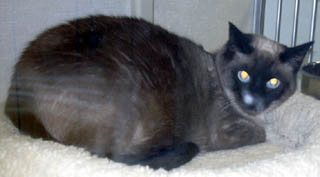

In [28]:
from PIL import Image
Image.open(cat[2])

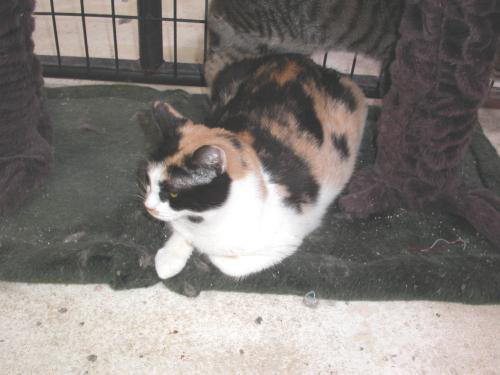

In [29]:
Image.open(cat[4])

In [30]:
dog = list(data_dir.glob('dog/*.jpg'))[:5]

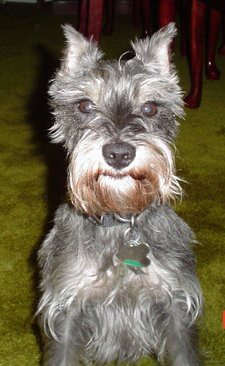

In [31]:
Image.open(dog[2])

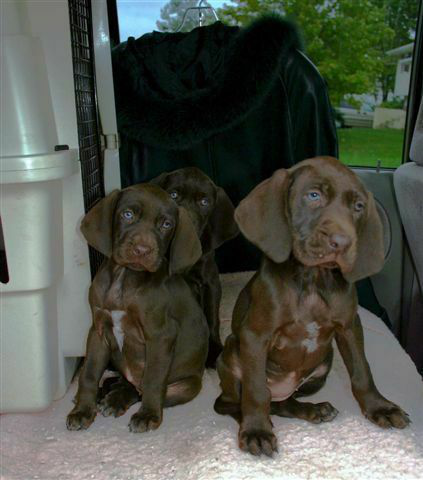

In [32]:
Image.open(dog[3])

## Step 5: Model Building

- For our model we need all the images should be in the combination of class number, thier count number and file type. Example cat.09.jpg, dog.23.jpg,etc. So, we are using the below method for renaming the images.

### Rename Cat images

In [ ]:
import os

# Function to rename multiple files
def main():

    folder = (r'E:\Course\Datamites\Final_Projects\AI Projects\Cats and Dogs\PetImages\Cat')
    for count, filename in enumerate(os.listdir(folder)):
        dst = f"cat.{str(count)}.jpg"
        src =f"{folder}/{filename}"  # foldername/filename, if .py file is outside folder
        dst =f"{folder}/{dst}"

        # rename() function will
        # rename all the files
        os.rename(src, dst)

# Driver Code
if __name__ == '__main__':

    # Calling main() function
    main()

### Rename Dog Images

In [ ]:
# Function to rename multiple files
def main():

    folder = (r'E:\Course\Datamites\Final_Projects\AI Projects\Cats and Dogs\PetImages\Dog')
    for count, filename in enumerate(os.listdir(folder)):
        dst = f"dog.{str(count)}.jpg"
        src =f"{folder}/{filename}"  # foldername/filename, if .py file is outside folder
        dst =f"{folder}/{dst}"

        # rename() function will
        # rename all the files
        os.rename(src, dst)

# Driver Code
if __name__ == '__main__':

    # Calling main() function
    main()

In [33]:
import os, shutil, pathlib

original_dir = pathlib.Path(r"E:\Course\Datamites\Final_Projects\AI Projects\Cats and Dogs\PetImages\train") # get the path of train folder in cats_dogs_images using copypath and paste the link here (it is the extracted original Folder)
new_base_dir = pathlib.Path(r"E:\Course\Datamites\Final_Projects\AI Projects\Cats and Dogs\PetImages\image_seggrated") # create a new folder, rename it and get the path using copypath and paste the link here

In [34]:
# Don't run again

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            try:
                shutil.copyfile(src=original_dir / fname,dst=dir / fname)
            except Exception as e:
                print(e)


# calling the function thrice to create 3 subsets.
make_subset("train", start_index=0, end_index=7500)
make_subset("validation", start_index=7500, end_index=10000)
make_subset("test", start_index=10000, end_index=12500)

### Insights:
- Here we are diving the cat and dog images into 3 different sections  for Training, Validation and Testing purpose

In [36]:
# creating labels of images and appending

labels = ['cat', 'dog']
img_size = 224
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)  # Index value of cat is 0 so its label is 0 and same for dog class
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num]) # now train have 2 things image and correspoinding label
            except Exception as e:
                print(e)
    return np.array(data)

#### Insights
- Here we are giving labels to cats (0) and dog images (1).
- Then we are converting images to preferred shapes (224,224,3).
- After giving labels to each class we are appending resized images with there corresponding labels.

In [40]:
# We will call the above function 3 times to create training,testing and validation data.

train = get_data(r'E:\Course\Datamites\Final_Projects\AI Projects\Cats and Dogs\PetImages\image_seggrated\train')
val = get_data(r'E:\Course\Datamites\Final_Projects\AI Projects\Cats and Dogs\PetImages\image_seggrated\validation')
test = get_data(r'E:\Course\Datamites\Final_Projects\AI Projects\Cats and Dogs\PetImages\image_seggrated\test')

In [55]:
val.shape

(4988, 2)

In [41]:
train.shape

(14969, 2)

In [56]:
test.shape

(4989, 2)

In [42]:
train[0].shape

(2,)

In [45]:
type(train[0][0])

numpy.ndarray

In [44]:
train[0][0].shape

(224, 224, 3)

#### Insight
- We have nearly 15000 images for traing, 5000 for validation and 5000 for testing
- Size of each image is 224,224 and total channels are 3 (RGB)
- We have 2 labels here 0 for Cat and 1 for Dog

In [46]:
x_train = []
y_train = []
x_val = []
y_val = []

In [47]:
for feature, label in train:  # now train have 2 things image and correspoinding label
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

# Normalize the data
x_train = np.array(x_train).astype('float32') / 255
x_val = np.array(x_val).astype('float32') / 255

In [48]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

### Creating our customized model

In [49]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [50]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_7 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
history = model.fit(x_train, y_train, batch_size=256, epochs=10,
          validation_data=(x_val, y_val),
          verbose=2, shuffle=True)

Epoch 1/10
63/63 [==============================] - 950s 13s/step - loss: 3.4854 - accuracy: 0.5513 - val_loss: 9.6225 - val_accuracy: 0.4985
Epoch 2/10
63/63 [==============================] - 12s 189ms/step - loss: 1.3864 - accuracy: 0.6223 - val_loss: 4.9647 - val_accuracy: 0.5005
Epoch 3/10
63/63 [==============================] - 12s 181ms/step - loss: 0.9187 - accuracy: 0.6348 - val_loss: 1.1220 - val_accuracy: 0.5386
Epoch 4/10
63/63 [==============================] - 13s 188ms/step - loss: 0.7326 - accuracy: 0.6578 - val_loss: 1.0511 - val_accuracy: 0.5306
Epoch 5/10
63/63 [==============================] - 13s 193ms/step - loss: 0.6327 - accuracy: 0.6843 - val_loss: 0.8284 - val_accuracy: 0.5727
Epoch 6/10
63/63 [==============================] - 9s 140ms/step - loss: 0.5738 - accuracy: 0.7104 - val_loss: 0.6551 - val_accuracy: 0.6199
Epoch 7/10
63/63 [==============================] - 11s 153ms/step - loss: 0.4720 - accuracy: 0.7879 - val_loss: 0.7955 - val_accuracy: 0.6339
E

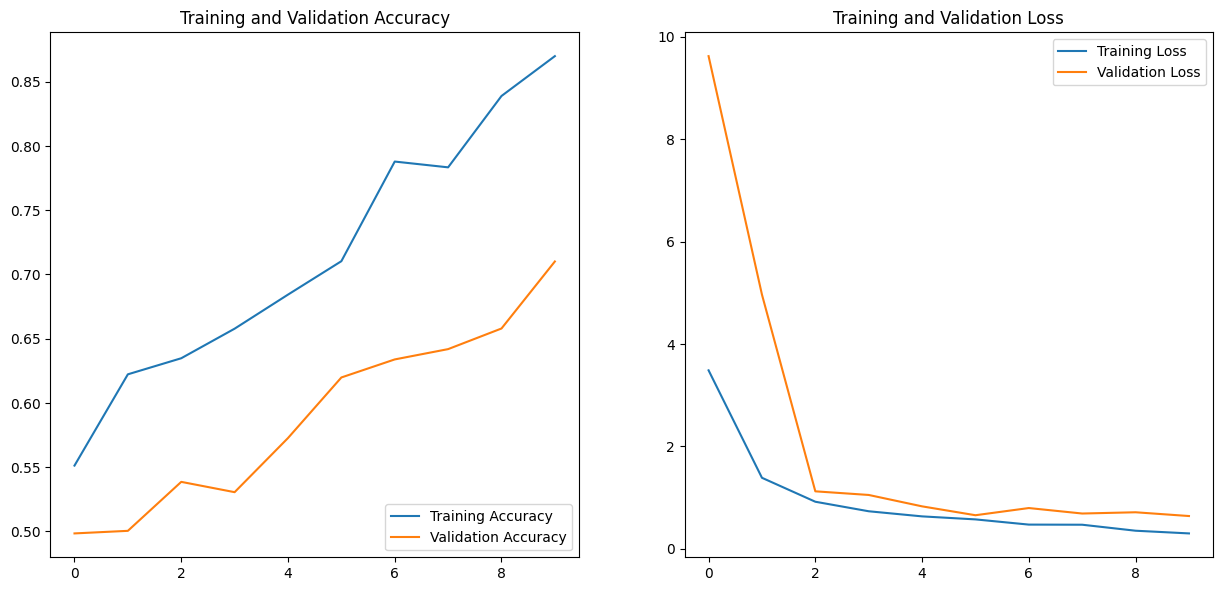

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Insights
- From the above graph we can say that our model training accuracy is continously increasing. Started from 55% and goes upto 87%.
- Validation Accuracy is less then the testing accuracy because it is the unseen data for the model.
- As the training accuracy and validation accuracy increases our loss decreases which means our model is now giving more correct prediction and less incorrect prediction.

## Step 6: Testing

 - Here we will predict new images with our model by predict function where we have to provide a path of new image as image path and using predict method. If the probability is more than 0.5 then the image will be of a dog else of cat.

In [28]:
test_img = cv2.imread('E:\Course\Datamites\Final_Projects\AI Projects\Cats and Dogs\PetImages\test.jpg')

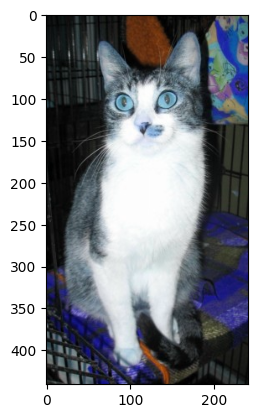

In [29]:
plt.imshow(test_img)

In [30]:
test_img.shape

(441, 241, 3)

In [31]:
test_img = cv2.resize(test_img,(224,224))

In [32]:
test_input = test_img.reshape((1,224,224,3))

In [33]:
a = model.predict(test_input)
if a==[[0]]:
    print('cat')
else:
    print('dog')

1/1 [==============================] - 0s 255ms/step
cat


### Insights:
- Here we can see that the model is giving the correct prediction for the tested Image (cat - 0).

## Conclusion

- Our model is giving correct prediction for the test image. We have tested on the cat image whose actual label is '0'. After conduction the prediction using our model we found the same label in result. Which means our model is prediction correctly. Best Training accuracy given by our model is nearly 87% And Validation accuracy is 71%.

- This model can be improved but because of project limited duration and as we know it is only for learning purpose we can consider it as the decent & suitable model.